In [4]:
from core import initialize_bodies
from core import calculate_displacement
from core import calculate_force
from core import Body
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

In [5]:
# initialize bodies with random masses, positions, and velocities over set range
# bodies[n] = Body(mass, position [x, y], velocity [vx, vy])
bodies = initialize_bodies(4, mass_range = [3, 10], position_range = [-50, 50], velocity_range = [-0.1,0.1])

'''
bodies = [
    Body(mass=500, position=[0, 200], velocity=[0, 0]),
    Body(mass=500, position=[0, -200], velocity=[0,0]),
    Body(mass=500, position=[-200,0], velocity=[0,0]),
    Body(mass=500, position=[200, 0], velocity=[0,0])
]'''

'\nbodies = [\n    Body(mass=500, position=[0, 200], velocity=[0, 0]),\n    Body(mass=500, position=[0, -200], velocity=[0,0]),\n    Body(mass=500, position=[-200,0], velocity=[0,0]),\n    Body(mass=500, position=[200, 0], velocity=[0,0])\n]'

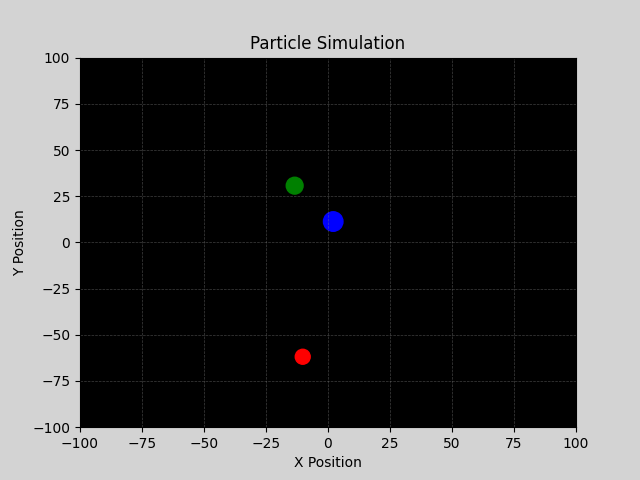

In [6]:
# Animation using matplotlib

%matplotlib widget

# Time step for position updates
dt = 0.05

# Set up the plot
fig, ax = plt.subplots()
ax.set_xlim(-100, 100) # X-axis limits
ax.set_ylim(-100, 100) # Y-axis limits
ax.set_title("Particle Simulation", color="black")  # Title
ax.set_xlabel("X Position", color="black")  # X-axis label
ax.set_ylabel("Y Position", color="black")  # Y-axis label
ax.tick_params(axis='x', colors="black")  # X-axis ticks
ax.tick_params(axis='y', colors="black")  # Y-axis ticks
ax.set_facecolor("black")  # Set background color
fig.patch.set_facecolor("lightgray")  # Outside the plot
ax.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.5)

# Body colors
colors = ['yellow', 'red', 'green', 'blue']
if len(colors) != len(bodies):
    raise ValueError('Not enough colors for all bodies')

# Create scatter plot with initial positions
scat = ax.scatter(
    [body.position[0] for body in bodies], # Initial x-coordinate of bodies
    [body.position[1] for body in bodies], # Initial y-coordinate of bodies
    s = [body.mass * 20 for body in bodies], # Size of bodies proportional to mass
    c=colors,  # Color of bodies
)

# Update function for animation
def update_position(frame):

    updated_positions = [] # Initialize as a list

    for n, body in enumerate(bodies):
        F = calculate_force(bodies)

        # Leapfrog method
        body.velocity += 0.5 * (np.sum(F[:,n]) / body.mass) * dt # Update velocity (half step)
        body.position += body.velocity * dt # Update position (full step)
        F = calculate_force(bodies) # Recalculate force
        body.velocity += 0.5 * (np.sum(F[:,n]) / body.mass) * dt # Update velocity (second half step)

        updated_positions.append(body.position)  # Collect new positions

    scat.set_offsets(updated_positions)  # Update scatter plot
  
    return scat

# Create the animation
ani = animation.FuncAnimation(
    fig=fig,
    func=update_position,
    frames=range(1000),  # Number of frames
    interval=10,  # Time between frames in milliseconds
    repeat=False,  # Stop after the last frame
)

ani.save('particle_simulation.mp4', writer='ffmpeg', fps=30) # Save animation as .mp4

# Show the plot
plt.show()

In [ ]:
U, R = calculate_displacement(bodies)
#print(f' x-component of displacement matrix \n{U[:,:,0]}')
#print(f' y-component of displacement matrix \n{U[:,:,1]}')

#print(f' distance matrix \n{R[:,:]}')

F = calculate_force(bodies)
#print(f' x-component of force matrix \n {F[:,:,0]}')
#print(f' y-component of force matrix \n {F[:,:,1]}')

for i, body in enumerate(bodies):
    print(f'Net foce on body_{i} Fx = {np.sum(F[:,i,0])} Fy = {np.sum(F[:,i,1])})')